# **Importing the libraries**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# **Loading the joined Data from SQL:**

In [9]:
#selecting the path for the dataframe
file_path = "//Users/sebastiangurgel/Desktop/Masteryproject1/Not used/query_results-2023-08-25_40326.csv"

df = pd.read_csv(file_path, low_memory=False)


# **Checking the Dataset**

In [19]:
# checking the first 3 rows
df.head(3)

,session_id,user_id,trip_id,session_start,session_end,flight_discount,hotel_discount,flight_discount_amount,hotel_discount_amount,flight_booked,hotel_booked,page_clicks,cancellation,user_id.1,birthdate,gender,married,has_children,home_country,home_city,home_airport,home_airport_lat,home_airport_lon,sign_up_date,trip_id.1,origin_airport,destination,destination_airport,seats,return_flight_booked,departure_time,return_time,checked_bags,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,trip_id.2,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_per_room_usd
0,365825-7b348567fdae44498d5e8a0f0a5b1713,365825,NaN,2023-01-04 16:06:00,2023-01-04 16:06:14,False,False,NaN,NaN,False,False,2,False,365825,1979-05-10,F,False,False,usa,los angeles,LAX,33.942,-118.408,2022-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,385689-5a95f307608c4b5ab0d664fe6e9413b4,385689,NaN,2023-01-04 13:21:00,2023-01-04 13:21:24,False,False,NaN,NaN,False,False,3,False,385689,1974-10-08,F,False,True,usa,nashville,BNA,36.124,-86.678,2022-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,388767-304d033927fe4bf79333ccdf03753dcf,388767,NaN,2023-01-04 21:27:00,2023-01-04 21:27:43,False,False,NaN,NaN,False,False,6,False,388767,1979-09-13,F,True,True,usa,tallahassee,TLH,30.396,-84.350,2022-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# checking statistical values for each numeric column
df.describe()

,user_id,flight_discount_amount,hotel_discount_amount,page_clicks,user_id.1,home_airport_lat,home_airport_lon,seats,checked_bags,destination_airport_lat,destination_airport_lon,base_fare_usd,nights,rooms,hotel_per_room_usd
count,49211.000000,8282.000000,6205.000000,49211.000000,49211.000000,49211.000000,49211.000000,14270.000000,14270.000000,14270.000000,14270.000000,14270.000000,14726.000000,14726.000000,14726.000000
mean,545282.694946,0.139864,0.112192,17.588791,545282.694946,38.427222,-94.183762,1.215207,0.592922,38.610024,-88.947203,525.901390,3.672484,1.194554,177.937390
std,64640.047648,0.083914,0.062119,21.495987,64640.047648,6.185962,18.065868,0.585891,0.677641,6.949739,33.090373,818.296468,3.806717,0.499344,118.334569
min,23557.000000,0.050000,0.050000,1.000000,23557.000000,21.316000,-157.927000,1.000000,0.000000,-37.008000,-157.927000,2.410000,-2.000000,1.000000,17.000000
25%,517119.000000,0.100000,0.050000,6.000000,517119.000000,33.818000,-112.383000,1.000000,0.000000,33.942000,-112.383000,200.432500,1.000000,1.000000,99.000000
50%,540308.000000,0.100000,0.100000,13.000000,540308.000000,39.103000,-90.035000,1.000000,1.000000,39.872000,-87.752000,381.765000,2.000000,1.000000,148.000000
75%,573922.000000,0.200000,0.150000,22.000000,573922.000000,42.238000,-79.370000,1.000000,1.000000,42.409000,-75.241000,600.632500,5.000000,1.000000,222.000000
max,844489.000000,0.600000,0.450000,566.000000,844489.000000,61.251000,-63.499000,8.000000,8.000000,55.972000,174.792000,21548.040000,43.000000,4.000000,1376.000000


In [21]:
# checking the datatypes of each row for further manupilation purposes
df.dtypes

session_id                  object
user_id                      int64
trip_id                     object
session_start               object
session_end                 object
flight_discount               bool
hotel_discount                bool
flight_discount_amount     float64
hotel_discount_amount      float64
flight_booked                 bool
hotel_booked                  bool
page_clicks                  int64
cancellation                  bool
user_id.1                    int64
birthdate                   object
gender                      object
married                       bool
has_children                  bool
home_country                object
home_city                   object
home_airport                object
home_airport_lat           float64
home_airport_lon           float64
sign_up_date                object
trip_id.1                   object
origin_airport              object
destination                 object
destination_airport         object
seats               

# **Searching for Outlier**
after inspecting the describe():
base_fare_usd Max= 21548 seems quite high
page clicks 566, hotel_per_room 1376 and nights 43 needs a verification check:
1) Visual Inspection
2) statistical Evaluation

In [42]:
# Plotting a histogram for base_fare_usd
import matplotlib.pyplot as plt

def plot_histogram(data_frame, column_name, bins=100, color='blue', alpha=0.7):
    """
    Plot a histogram for a specific column in a DataFrame.

    Args:
        data_frame (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot.
        bins (int, optional): Number of bins for the histogram. Default is 100.
        color (str, optional): Color of the bars in the histogram. Default is 'blue'.
        alpha (float, optional): Transparency of the bars in the histogram. Default is 0.7.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data_frame[column_name], bins=bins, color=color, alpha=alpha)
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


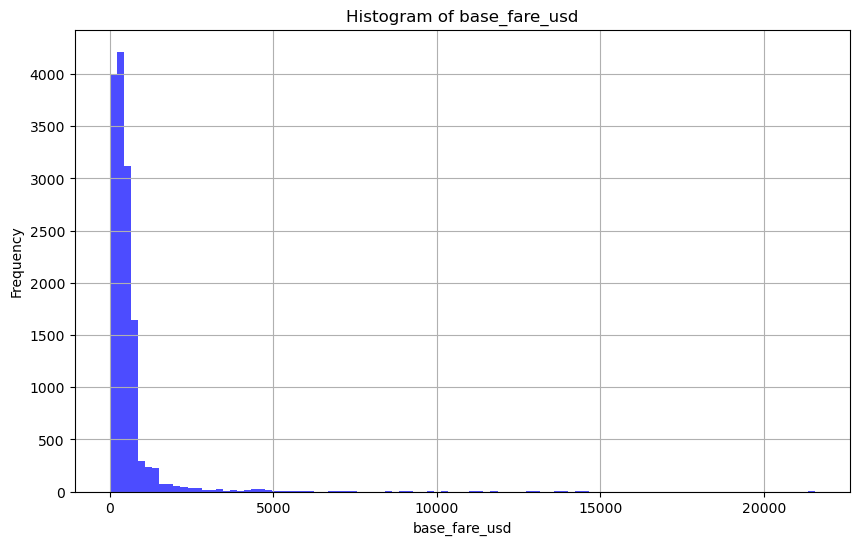

In [47]:
plot_histogram(df, 'base_fare_usd')

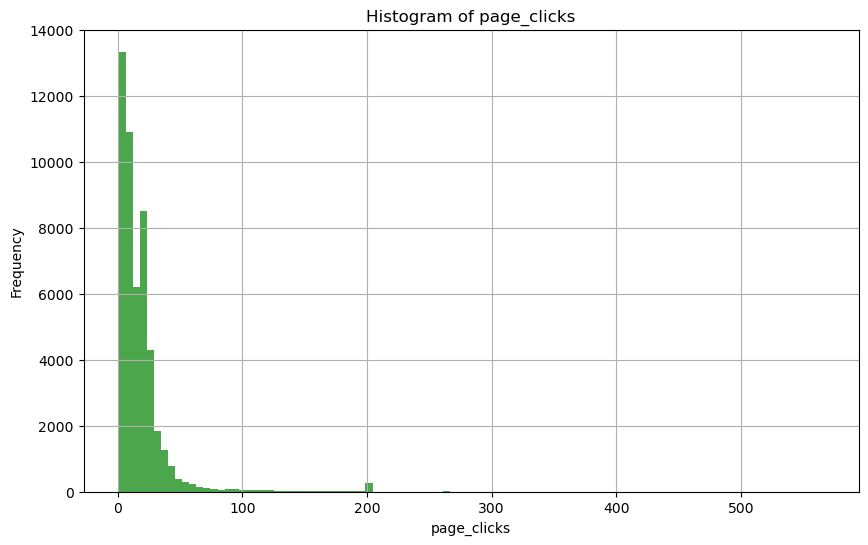

In [48]:
# Plotting a  histogram for page_clicks
plot_histogram(df, 'page_clicks', color='green')


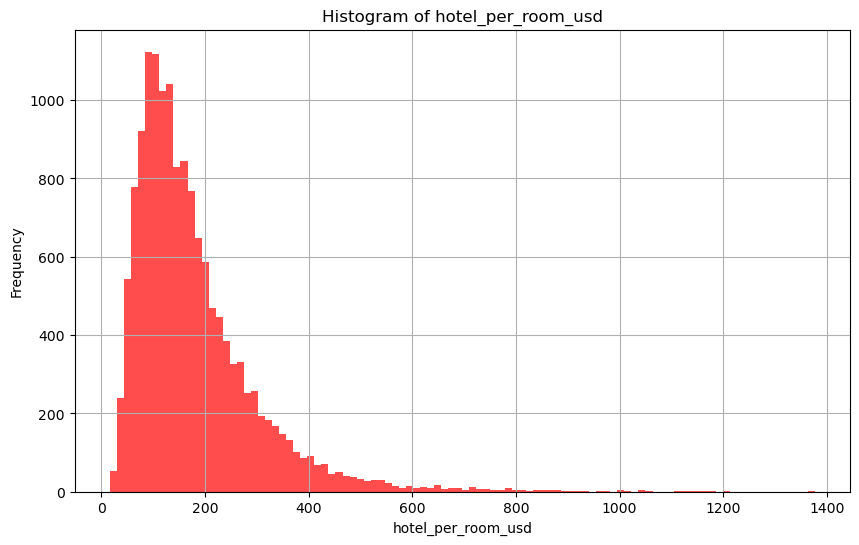

In [55]:
plot_histogram(df, 'hotel_per_room_usd', color='red')

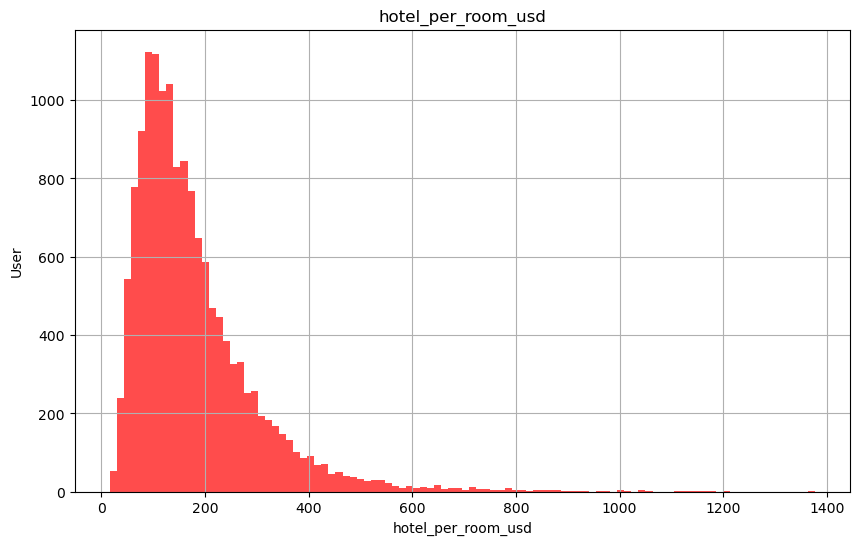

In [51]:
# Plotting a histogram for hotel_per_room
plot_histogram(df, 'hotel_per_room_usd', color='brown')


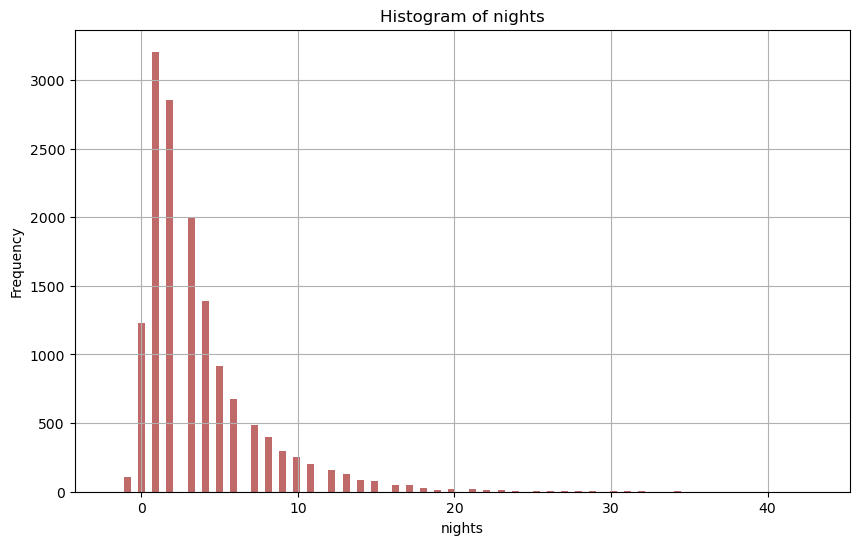

In [57]:
# Plotting histogram for hotel_per_room
plot_histogram(df, 'nights', color='brown')

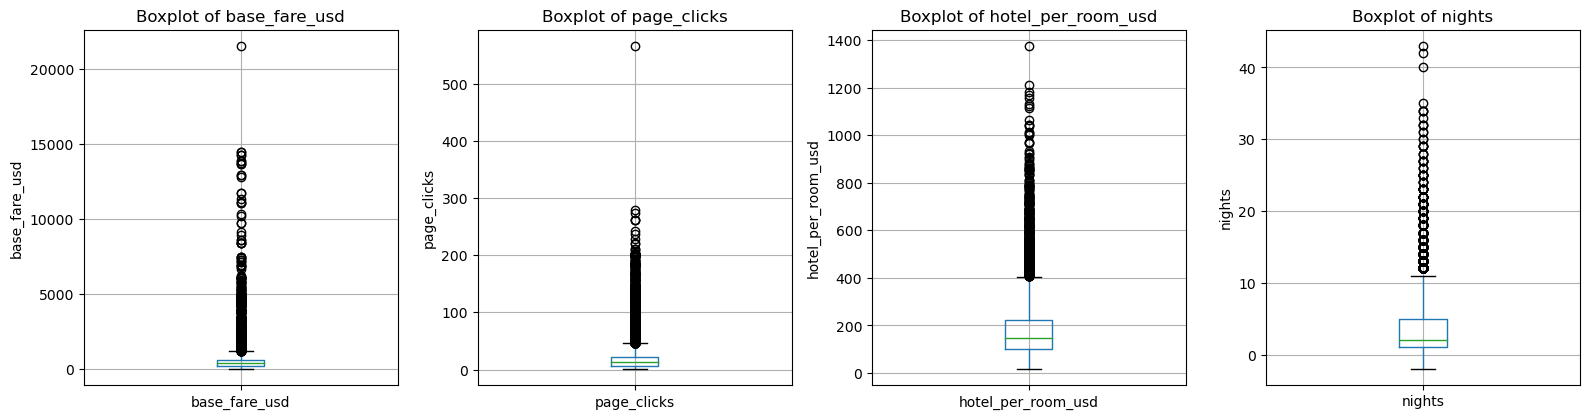

In [166]:
# # Creating a subplot with boxplots
column_names = ['base_fare_usd','page_clicks', 'hotel_per_room_usd', 'nights']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Loop through each column and create the corresponding boxplot in the subplot
for i, column_name in enumerate(column_names):
    row_idx = i // 4
    col_idx = i % 4
    df.boxplot(column=column_name, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_ylabel(column_name)
    axes[row_idx, col_idx].set_title(f'Boxplot of {column_name}')

# Remove any empty subplot if the number of columns is not divisible by 4
if len(column_names) < 8:
    for i in range(len(column_names), 8):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# *The boxplots make our Inspection clearly visible:*


1.   base_fare_usd outlier starting around 7500 and thers is value at 21548
2.   page clicks outlier starting around 250 and thers is value at 566
3.   hotel_per_room outlier starting around 900 and thers is value at 1376
4.   nights outlier starting around 10 and there are values at 40





# **Interquartile Range (IQR) method for Outlier**

In [13]:
# Using the interquartile range method to filter the outlier on statistical values
numeric_columns = ['base_fare_usd', 'page_clicks', 'hotel_per_room_usd','nights']

df_filtered = pd.DataFrame()

# calculating IQR and defining the tresholds  and iterating over every row in the dataset
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    if col == 'base_fare_usd':
        outlier_threshold = 15 * IQR
    elif col == 'page_clicks':
        outlier_threshold = 12 * IQR
    elif col == 'hotel_per_room_usd':
        outlier_threshold = 6 * IQR
    else:
        outlier_threshold = 8 * IQR

    outlier_mask = (df[col] < (Q1 - outlier_threshold)) | (df[col] > (Q3 + outlier_threshold))
    df_filtered[col] = df[col][~outlier_mask]



# **Handling outliers in this Dataset manually**
The Interquartile Range (IQR) method, seems quite strict with 5 * IQR, but to get my intended result i decided to manually adjust the threshold for evey possible outlier




In [15]:
#checking statistical values of the outlier dataset
df_filtered.describe()

,base_fare_usd,page_clicks,hotel_per_room_usd,nights
count,14225.000000,49155.000000,14691.000000,14707.000000
mean,494.974915,17.491405,176.780478,3.653906
std,580.547117,20.964505,113.818576,3.754886
min,2.410000,1.000000,17.000000,-2.000000
25%,199.830000,6.000000,99.000000,1.000000
50%,380.840000,13.000000,148.000000,2.000000
75%,597.900000,22.000000,222.000000,5.000000
max,6194.480000,211.000000,932.000000,35.000000


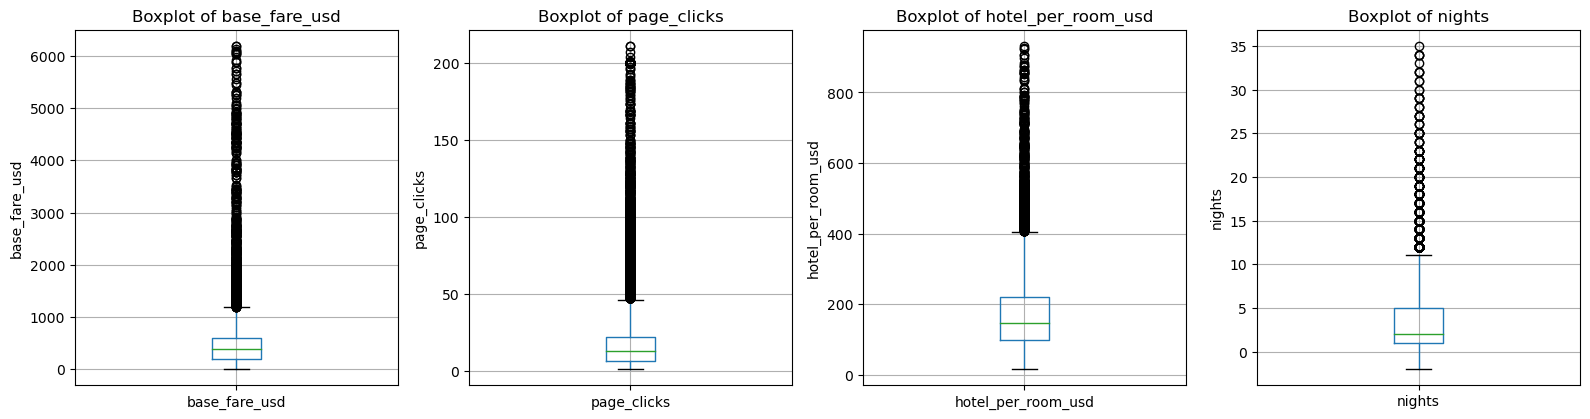

In [17]:
# #  Creating a subplot with boxplots
column_names = ['base_fare_usd','page_clicks','hotel_per_room_usd', 'nights']

# Create a 2x4 subplot (2 rows and 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Loop through each column and create the corresponding boxplot in the subplot
for i, column_name in enumerate(column_names):
    row_idx = i // 4
    col_idx = i % 4
    df_filtered.boxplot(column=column_name, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_ylabel(column_name)
    axes[row_idx, col_idx].set_title(f'Boxplot of {column_name}')

# Remove any empty subplot if the number of columns is not divisible by 4
if len(column_names) < 8:
    for i in range(len(column_names), 8):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


# **Export to CSV**

Exporte the dataset again to manually filter the outlier and perform the aggregations in SQL/PGadmin4, since it seems to be faster and more visual in SQL

In [18]:
 #df_filtered.to_csv('/Users/sebastiangurgel/Desktop/Masteryproject1/raw_data_filtered.csv', index=False)


# **Loading the aggregated and Outliner cleaned Data from SQL on a user level**

In [61]:
url = "/Users/sebastiangurgel/Desktop/Masteryproject1/Not used/outlier_aggregated_data.csv"
df_clean = pd.read_csv(url, low_memory=False)

In [62]:
df_clean.columns

Index(['user_id', 'age', 'sign_up_date', 'last_session_start', 'gender',
       'married', 'has_children', 'home_city', 'home_country',
       'number_of_sessions', 'avg_page_clicks', 'avg_session_length_minutes',
       'recent_session', 'number_of_trips', 'number_of_flights',
       'number_of_hotels', 'num_cancellations', 'trips_cancellations_ratio',
       'avg_checked_bags', 'avg_seats', 'avg_flight_discount_amount',
       'discount_flight_proportion', 'avg_base_fare', 'ads',
       'avg_hotel_discount_amount', 'avg_flight_total_usd', 'avg_distance_km',
       'ads_per_km', 'avg_hotel_total_usd', 'discount_hotel_proportion',
       'avg_hotel_length'],
      dtype='object')

In [63]:
df_clean.head()

,user_id,age,sign_up_date,last_session_start,gender,married,has_children,home_city,home_country,number_of_sessions,avg_page_clicks,avg_session_length_minutes,recent_session,number_of_trips,number_of_flights,number_of_hotels,num_cancellations,trips_cancellations_ratio,avg_checked_bags,avg_seats,avg_flight_discount_amount,discount_flight_proportion,avg_base_fare,ads,avg_hotel_discount_amount,avg_flight_total_usd,avg_distance_km,ads_per_km,avg_hotel_total_usd,discount_hotel_proportion,avg_hotel_length
0,23557,64,2021-07-22,2023-07-14 12:36:00,F,True,False,new york,usa,8,10,1.3,38,2,0,2,0,0.0,NaN,NaN,NaN,0.00000,NaN,NaN,0.18,0.00,NaN,0.00,19.59,0.250,10.0
1,94883,51,2022-02-07,2023-05-28 17:28:00,F,True,False,kansas city,usa,8,9,1.1,85,2,2,2,0,0.0,1.0,2.0,NaN,0.00000,432.05,NaN,0.10,108.01,1451.34,0.00,22.50,0.125,1.0
2,101486,50,2022-02-17,2023-07-18 09:35:00,F,True,True,tacoma,usa,8,16,2.0,35,2,1,2,0,0.0,NaN,1.0,0.08,0.03125,189.91,0.00,NaN,23.74,995.68,0.00,49.63,0.000,4.0
3,101961,42,2022-02-17,2023-06-22 13:27:00,F,True,False,boston,usa,8,16,2.0,60,5,5,5,0,0.0,1.0,1.0,0.15,0.03125,248.53,2.48,0.10,149.74,1366.57,0.02,85.00,0.125,4.0
4,106907,44,2022-02-24,2023-03-24 18:09:00,F,True,True,miami,usa,6,23,2.8,150,0,0,0,0,0.0,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.000,NaN


In [64]:
# quick check with the descibe() function if the rows are correct and the outlier are removed
df_clean.describe()

,user_id,age,number_of_sessions,avg_page_clicks,avg_session_length_minutes,recent_session,number_of_trips,number_of_flights,number_of_hotels,num_cancellations,trips_cancellations_ratio,avg_checked_bags,avg_seats,avg_flight_discount_amount,discount_flight_proportion,avg_base_fare,ads,avg_hotel_discount_amount,avg_flight_total_usd,avg_distance_km,ads_per_km,avg_hotel_total_usd,discount_hotel_proportion,avg_hotel_length
count,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,5998.000000,4074.000000,5169.000000,4671.000000,5998.000000,5169.000000,4671.000000,4006.000000,5998.000000,5169.000000,5998.00000,5998.000000,5998.000000,5397.000000
mean,545440.695565,40.948816,8.192231,17.577526,3.083211,65.837112,2.772424,2.368123,2.447816,0.098866,0.010053,1.150466,1.214161,0.141250,0.020614,500.206914,16.569657,0.112416,126.250130,2421.883401,0.00979,46.759812,0.138017,4.280341
std,64924.749760,12.048380,0.481673,8.624738,3.970954,29.465841,1.570656,1.564530,1.509636,0.306772,0.031955,0.422996,0.479035,0.071354,0.016012,480.941356,46.536804,0.054368,152.243262,2099.448763,0.02150,37.002164,0.121444,2.860509
min,23557.000000,16.000000,5.000000,4.000000,0.500000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.050000,0.000000,5.350000,0.000000,0.050000,0.000000,27.450000,0.00000,0.000000,0.000000,-1.000000
25%,517152.000000,34.000000,8.000000,12.000000,1.500000,43.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.100000,0.012346,279.980000,0.000000,0.080000,30.657500,1473.410000,0.00000,18.542500,0.000000,2.000000
50%,540542.000000,41.000000,8.000000,16.000000,1.900000,58.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.130000,0.015625,390.640000,0.000000,0.100000,91.075000,2043.480000,0.00000,40.130000,0.125000,4.000000
75%,574146.000000,48.000000,8.000000,20.000000,2.475000,81.000000,4.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.180000,0.031250,557.770000,15.890000,0.150000,166.075000,2729.670000,0.01000,68.227500,0.250000,5.000000
max,844489.000000,88.000000,12.000000,86.000000,35.600000,195.000000,9.000000,9.000000,9.000000,2.000000,0.300000,5.000000,6.000000,0.550000,0.093750,6052.900000,1473.800000,0.450000,1613.760000,23057.330000,0.35000,253.630000,0.750000,30.000000


In [65]:
# checking the rows
df_clean.shape

(5998, 31)



---






# **MInMax Scaling the Features needed for Segmentation**

In [66]:
 # Replace NaN values with 0 in the entire DataFrame to prepare the data to bring them on one scale(scaling)
df_clean.fillna(0, inplace=True)

In [67]:
# converting boolean columns into integer
#df_clean['gender'] = df_clean['gender'].astype(int) 
df_clean['married'] = df_clean['married'].astype(int)
df_clean['has_children'] = df_clean['has_children'].astype(int)


In [68]:
# there are 3 values in the gender column, so there are not easy to convert before deciding what to do with them
print(df['gender'].value_counts())



F    43486
M     5635
O       90
Name: gender, dtype: int64


In [69]:
df_clean.head()

,user_id,age,sign_up_date,last_session_start,gender,married,has_children,home_city,home_country,number_of_sessions,avg_page_clicks,avg_session_length_minutes,recent_session,number_of_trips,number_of_flights,number_of_hotels,num_cancellations,trips_cancellations_ratio,avg_checked_bags,avg_seats,avg_flight_discount_amount,discount_flight_proportion,avg_base_fare,ads,avg_hotel_discount_amount,avg_flight_total_usd,avg_distance_km,ads_per_km,avg_hotel_total_usd,discount_hotel_proportion,avg_hotel_length
0,23557,64,2021-07-22,2023-07-14 12:36:00,F,1,0,new york,usa,8,10,1.3,38,2,0,2,0,0.0,0.0,0.0,0.00,0.00000,0.00,0.00,0.18,0.00,0.00,0.00,19.59,0.250,10.0
1,94883,51,2022-02-07,2023-05-28 17:28:00,F,1,0,kansas city,usa,8,9,1.1,85,2,2,2,0,0.0,1.0,2.0,0.00,0.00000,432.05,0.00,0.10,108.01,1451.34,0.00,22.50,0.125,1.0
2,101486,50,2022-02-17,2023-07-18 09:35:00,F,1,1,tacoma,usa,8,16,2.0,35,2,1,2,0,0.0,0.0,1.0,0.08,0.03125,189.91,0.00,0.00,23.74,995.68,0.00,49.63,0.000,4.0
3,101961,42,2022-02-17,2023-06-22 13:27:00,F,1,0,boston,usa,8,16,2.0,60,5,5,5,0,0.0,1.0,1.0,0.15,0.03125,248.53,2.48,0.10,149.74,1366.57,0.02,85.00,0.125,4.0
4,106907,44,2022-02-24,2023-03-24 18:09:00,F,1,1,miami,usa,6,23,2.8,150,0,0,0,0,0.0,0.0,0.0,0.00,0.00000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000,0.0


In [70]:
#Defining the numerical  to be scaled from the dataset
scaled_features = [ 'age', 'has_children', 'married',
       'number_of_sessions', 'avg_page_clicks', 'avg_session_length_minutes',
       'number_of_trips', 'number_of_flights',
       'number_of_hotels', 'num_cancellations', 'trips_cancellations_ratio',
       'avg_checked_bags', 'avg_seats', 'avg_flight_discount_amount',
       'discount_flight_proportion', 'avg_base_fare', 'ads',
       'avg_hotel_discount_amount', 'avg_flight_total_usd', 'avg_distance_km',
       'ads_per_km', 'avg_hotel_total_usd', 'discount_hotel_proportion',
       'avg_hotel_length']

In [71]:
# Create a new DataFrame with the scaled features for the segmentation
scaled_metrics = df_clean[scaled_features]

In [72]:
# Scale the features using Min-Max scaling

scaled_metrics_scaled = ((scaled_metrics - scaled_metrics.min()) / (scaled_metrics.max() - scaled_metrics.min()))

In [73]:
# checking the first 5 rowso f the scaled data
scaled_metrics_scaled.head()

,age,has_children,married,number_of_sessions,avg_page_clicks,avg_session_length_minutes,number_of_trips,number_of_flights,number_of_hotels,num_cancellations,trips_cancellations_ratio,avg_checked_bags,avg_seats,avg_flight_discount_amount,discount_flight_proportion,avg_base_fare,ads,avg_hotel_discount_amount,avg_flight_total_usd,avg_distance_km,ads_per_km,avg_hotel_total_usd,discount_hotel_proportion,avg_hotel_length
0,0.666667,0.0,1.0,0.428571,0.073171,0.022792,0.222222,0.000000,0.222222,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.077238,0.333333,0.354839
1,0.486111,0.0,1.0,0.428571,0.060976,0.017094,0.222222,0.222222,0.222222,0.0,0.0,0.2,0.333333,0.000000,0.000000,0.071379,0.000000,0.222222,0.066931,0.062945,0.000000,0.088712,0.166667,0.064516
2,0.472222,1.0,1.0,0.428571,0.146341,0.042735,0.222222,0.111111,0.222222,0.0,0.0,0.0,0.166667,0.145455,0.333333,0.031375,0.000000,0.000000,0.014711,0.043183,0.000000,0.195679,0.000000,0.161290
3,0.361111,0.0,1.0,0.428571,0.146341,0.042735,0.555556,0.555556,0.555556,0.0,0.0,0.2,0.166667,0.272727,0.333333,0.041060,0.001683,0.222222,0.092790,0.059268,0.057143,0.335134,0.166667,0.161290
4,0.388889,1.0,1.0,0.142857,0.231707,0.065527,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258


In [74]:
 #df_filtered.to_csv('/Users/sebastiangurgel/Desktop/Masteryproject1/scaled.csv', index=False)



---


---





# **Segmenting the Data on Thresholds**



*   free hotel meal
*   free checked bag
*   no cancellation fees
*   exclusive discounts
*   1 night free hotel with flight



In [75]:
# adding a new column
df_clean['avg_total_spent'] = df_clean['avg_hotel_total_usd'] + df_clean['avg_flight_total_usd']



---



# **1) Free Hotel Meal**

In [186]:
#Filtering the condition for the Free Hotel Meal Perk:
#1) number of hotel bookings >= 1
#2) age > 36 Years
#3) Hotelprice > 100

# Condition 1:
condition1 = (df_clean['number_of_hotels'] > 2) & (df_clean['age'] > 36) & (df_clean['avg_hotel_total_usd'] > 100 )

perk_label = 'Free Hotel Meal'

df_clean.loc[condition1, 'perk_label'] = perk_label

# Filter the DataFrame based on the condition
filtered_customers = df_clean[condition1]

# Initialize a DataFrame to store rank values
rank_df = filtered_customers[['user_id', 'number_of_hotels', 'age', 'avg_hotel_total_usd']].copy()

# Scale the metrics for rank calculation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rank_df[['number_of_hotels', 'age', 'avg_hotel_total_usd']])
scaled_df_5 = pd.DataFrame(scaled_data, columns=['number_of_hotels_scaled', 'age_scaled', 'avg_hotel_total_usd_scaled'])
scaled_df_5['user_id'] = rank_df['user_id']
scaled_df_5['rank_free_hotel_meal'] = 0.2 * scaled_df_5['number_of_hotels_scaled'] + 0.3 * scaled_df_5['age_scaled'] + 0.6 * scaled_df_5['avg_hotel_total_usd_scaled']

# Sort the scaled DataFrame by rank
scaled_df_5 = scaled_df_5.sort_values(by='rank_free_hotel_meal')

# Merge the scaled_df DataFrame back into df_clean
df_clean = df_clean.merge(scaled_df_5[['user_id', 'rank_free_hotel_meal']], on='user_id', how='left')

# Sort the df_clean DataFrame by rank
df_clean = df_clean.sort_values(by='rank_free_hotel_meal', ascending=False)

# Print the resulting DataFrame with relevant columns
df_clean[['user_id', 'number_of_hotels', 'age', 'avg_hotel_total_usd', 'rank_free_hotel_meal']].head()


,user_id,number_of_hotels,age,avg_hotel_total_usd,rank_free_hotel_meal
208,435882,4,50,112.44,0.588337
407,477730,5,44,151.79,0.554019
398,476665,6,38,125.38,0.474695
24,204943,7,40,167.63,0.448984
75,354050,5,49,109.23,0.389476




---



# **2) Free Checked Bags**

In [187]:

# Filtering the condition for Free Checked Bags Perk:
# 1) average checked bags >= 1
# 2) average distance >= 500
# 3) flight bookings >= 1


# Condition 2:
condition2 = (df_clean['avg_checked_bags'] >= 1) & \
              (df_clean['avg_distance_km'] >= 500) & \
              (df_clean['number_of_flights'] >= 1)

perk_label = 'Free Checked Bags'

df_clean.loc[condition2, 'perk_label'] = perk_label

# Filter the DataFrame based on the condition
filtered_customers = df_clean[condition2]

# Initialize a DataFrame to store rank values
rank_df = filtered_customers[['user_id', 'avg_checked_bags', 'avg_distance_km', 'number_of_flights']].copy()

# Scale the metrics  for rank calculation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rank_df[['avg_checked_bags', 'avg_distance_km', 'number_of_flights']])
scaled_df_6 = pd.DataFrame(scaled_data, columns=['avg_checked_bags_scaled', 'avg_distance_km_scaled', 'number_of_flights_scaled'])
scaled_df_6['user_id'] = rank_df['user_id']
scaled_df_6['rank_free_checked_bags'] = 0.6 * scaled_df_6['avg_checked_bags_scaled'] + 0.2 * scaled_df_6['avg_distance_km_scaled'] + 0.2 * scaled_df_6['number_of_flights_scaled']

# Sort the scaled DataFrame by rank
scaled_df_6 = scaled_df_6.sort_values(by='rank_free_checked_bags', ascending=False)

# Merge the scaled_df DataFrame back into df_clean
df_clean = df_clean.merge(scaled_df_6[['user_id', 'rank_free_checked_bags']], on='user_id', how='left')

# Sort the df_clean DataFrame by rank
df_clean = df_clean.sort_values(by='rank_free_checked_bags', ascending=False)

# Print the resulting DataFrame with relevant columns
df_clean[['user_id', 'avg_checked_bags', 'avg_distance_km', 'number_of_flights', 'rank_free_checked_bags']].head()



,user_id,avg_checked_bags,avg_distance_km,number_of_flights,rank_free_checked_bags
3831,557236,1.0,3271.53,4,0.716209
2453,530810,1.0,2273.56,3,0.655153
927,510326,2.0,1533.89,6,0.628274
2098,525405,1.0,3664.18,1,0.600453
1242,513796,1.0,2972.97,3,0.561746




---







# **3) No Cancellation Fees**

In [188]:
df_clean.columns

Index(['user_id', 'age', 'sign_up_date', 'last_session_start', 'gender',
       'married', 'has_children', 'home_city', 'home_country',
       'number_of_sessions', 'avg_page_clicks', 'avg_session_length_minutes',
       'recent_session', 'number_of_trips', 'number_of_flights',
       'number_of_hotels', 'num_cancellations', 'trips_cancellations_ratio',
       'avg_checked_bags', 'avg_seats', 'avg_flight_discount_amount',
       'discount_flight_proportion', 'avg_base_fare', 'ads',
       'avg_hotel_discount_amount', 'avg_flight_total_usd', 'avg_distance_km',
       'ads_per_km', 'avg_hotel_total_usd', 'discount_hotel_proportion',
       'avg_hotel_length', 'avg_total_spent', 'perk_label',
       'rank_free_hotel_meal', 'rank_free_checked_bags'],
      dtype='object')

In [189]:
# Filtering the condition for No Cancellation Fees Perk:
# 1) trips_cancellations_ratio >= 0.1
# 2) session length >= 16
# 2) average total spent > 110$

# Condition 3: No Cancellation Fees
condition3 = (
    (df_clean['trips_cancellations_ratio'] >= 0.1) &
    (df_clean['avg_session_length_minutes'] >= 16) &  # Adding avg_session_length_minutes condition
    (df_clean['avg_total_spent'] > 110)
)

perk_label = 'No Cancellation Fees'

# Filter the DataFrame based on the condition
filtered_customers = df_clean[condition3]

# Initialize a DataFrame to store rank values
rank_df = filtered_customers[['user_id', 'trips_cancellations_ratio', 'avg_total_spent', 'avg_session_length_minutes']].copy()  # Adding avg_session_length_minutes

# Scale the metrics for rank calculation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rank_df[['trips_cancellations_ratio', 'avg_total_spent', 'avg_session_length_minutes']])
scaled_df_no_cancellation_fees = pd.DataFrame(scaled_data, columns=['trips_cancellations_ratio_scaled', 'avg_total_spent_scaled', 'avg_session_length_minutes_scaled'])  # Adding avg_session_length_minutes_scaled
scaled_df_no_cancellation_fees['user_id'] = rank_df['user_id']
scaled_df_no_cancellation_fees['rank_no_cancellation_fees'] = (
    0.2 * scaled_df_no_cancellation_fees['trips_cancellations_ratio_scaled'] +
    0.4 * scaled_df_no_cancellation_fees['avg_total_spent_scaled'] +
    0.4 * scaled_df_no_cancellation_fees['avg_session_length_minutes_scaled']  # Adjusting weights with the added session length
)

# Sort the scaled DataFrame by rank
scaled_df_no_cancellation_fees = scaled_df_no_cancellation_fees.sort_values(by='rank_no_cancellation_fees')

# Merge the scaled_df DataFrame back into df_clean
df_clean = df_clean.merge(scaled_df_no_cancellation_fees[['user_id', 'rank_no_cancellation_fees']], on='user_id', how='left')

# Sort the df_clean DataFrame by rank
df_clean = df_clean.sort_values(by='rank_no_cancellation_fees', ascending=False)

# Print the resulting DataFrame with relevant columns
df_clean[['user_id', 'trips_cancellations_ratio', 'avg_total_spent', 'avg_session_length_minutes', 'rank_no_cancellation_fees']].head()



,user_id,trips_cancellations_ratio,avg_total_spent,avg_session_length_minutes,rank_no_cancellation_fees
699,171470,0.3,1055.96,30.7,0.749974
642,174997,0.1,431.31,16.5,0.302412
2319,357737,0.1,374.57,18.4,0.249036
2695,411179,0.1,151.53,17.5,0.150282
296,458479,0.3,215.38,35.6,0.126321




---



# **4) Exclusive Discounts**


In [190]:
# Filtering the condition for Exclusive Discounts Perk:
# 1) discount_flight_proportion> 0.01
# 2) discount_hotel_proportion > 0.1
# 3) dollar saved per km > 0.008

# Condition 4: Exclusive Discounts
condition4 = ((df_clean['discount_flight_proportion'] > 0.01) &
              (df_clean['discount_hotel_proportion'] > 0.1) &
              (df_clean['ads_per_km'] > 0.008))

perk_label = 'Exclusive Discounts'

# Assign the perk label based on condition 4
df_clean.loc[condition4, 'perk_label'] = perk_label

# Filter the DataFrame based on condition 4
filtered_customers = df_clean[condition4]

# Initialize a DataFrame to store rank values
rank_df = filtered_customers[['user_id', 'discount_flight_proportion', 'discount_hotel_proportion', 'ads_per_km']].copy()


# Scale the metrics for rank calculation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rank_df[['discount_flight_proportion', 'discount_hotel_proportion', 'ads_per_km']])
scaled_df_exclusive_discounts = pd.DataFrame(scaled_data, columns=['discount_flight_proportion', 'discount_hotel_proportion', 'ads_per_km'])
scaled_df_exclusive_discounts['user_id'] = rank_df['user_id']
scaled_df_exclusive_discounts['rank_exclusive_discounts'] = (0.5 * scaled_df_exclusive_discounts['discount_flight_proportion'] +
                                                             0.4 * scaled_df_exclusive_discounts['discount_hotel_proportion'] +
                                                             0.1 * scaled_df_exclusive_discounts['ads_per_km'])

# Sort the scaled DataFrame by rank
scaled_df_exclusive_discounts = scaled_df_exclusive_discounts.sort_values(by='rank_exclusive_discounts')

# Merge the scaled_df DataFrame back into df_clean
df_clean = df_clean.merge(scaled_df_exclusive_discounts[['user_id', 'rank_exclusive_discounts']], on='user_id', how='left')

# Sort the df_clean DataFrame by rank
df_clean = df_clean.sort_values(by='rank_exclusive_discounts', ascending=False)

# Print the resulting DataFrame with relevant columns
df_clean[['user_id', 'discount_flight_proportion', 'discount_hotel_proportion', 'ads_per_km', 'rank_exclusive_discounts']].head()


,user_id,discount_flight_proportion,discount_hotel_proportion,ads_per_km,rank_exclusive_discounts
845,544818,0.015625,0.125,0.08,0.599822
282,546648,0.031250,0.250,0.03,0.512852
1033,528421,0.046875,0.125,0.11,0.509822
994,474464,0.031250,0.125,0.08,0.506970
1030,547512,0.031250,0.250,0.02,0.498057




---



---



# **5) One Night Free Hotel**

In [191]:
# Filtering the condition for One Night Free Hotel Perk:
# 1) flight bookings > 1
# 2) hotel_bookings  > 1
# 3) average total spent > 100
# 4) must be married

# Condition 5: One Night Free Hotel
condition5 = ((df_clean['number_of_flights'] >= 1) &
              (df_clean['number_of_hotels'] >= 1)) & \
              (df_clean['avg_total_spent'] >= 100) & \
              (df_clean['married'] == True)

perk_label = 'One Night Free Hotel'

df_clean.loc[condition5, 'perk_label'] = perk_label

# Filter the DataFrame based on the condition
filtered_customers = df_clean[condition5]

# Initialize a DataFrame to store rank values
rank_df = filtered_customers[['user_id', 'number_of_flights', 'number_of_hotels', 'avg_total_spent']].copy()

# Scale the metrics  for rank calculation
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(rank_df[['number_of_flights', 'number_of_hotels', 'avg_total_spent']])
scaled_df_one_night_free_hotel = pd.DataFrame(scaled_data, columns=['number_of_flights_scaled', 'number_of_hotels_scaled', 'avg_total_spent_scaled'])
scaled_df_one_night_free_hotel['user_id'] = rank_df['user_id']
scaled_df_one_night_free_hotel['rank_one_night_free_hotel'] = (0.3 * scaled_df_one_night_free_hotel['number_of_flights_scaled'] +
                                                              0.3 * scaled_df_one_night_free_hotel['number_of_hotels_scaled'] +
                                                              0.4 * scaled_df_one_night_free_hotel['avg_total_spent_scaled'])

# Sort the scaled DataFrame by rank
scaled_df_one_night_free_hotel = scaled_df_one_night_free_hotel.sort_values(by='rank_one_night_free_hotel')

# Merge the scaled_df DataFrame back into df_clean
df_clean = df_clean.merge(scaled_df_one_night_free_hotel[['user_id', 'rank_one_night_free_hotel']], on='user_id', how='left')

# Sort the df_clean DataFrame by rank
df_clean = df_clean.sort_values(by='rank_one_night_free_hotel', ascending=False)

# Print the resulting DataFrame with relevant columns
df_clean[['user_id', 'number_of_flights', 'number_of_hotels', 'avg_total_spent', 'rank_one_night_free_hotel']].head()


,user_id,number_of_flights,number_of_hotels,avg_total_spent,rank_one_night_free_hotel
1353,544694,2,2,128.25,0.653042
773,499979,5,4,367.40,0.585335
603,546065,3,3,143.91,0.533962
638,560733,3,4,278.38,0.519042
3,474464,3,2,173.55,0.513588


In [192]:
df_clean.head()

,user_id,age,sign_up_date,last_session_start,gender,married,has_children,home_city,home_country,number_of_sessions,avg_page_clicks,avg_session_length_minutes,recent_session,number_of_trips,number_of_flights,number_of_hotels,num_cancellations,trips_cancellations_ratio,avg_checked_bags,avg_seats,avg_flight_discount_amount,discount_flight_proportion,avg_base_fare,ads,avg_hotel_discount_amount,avg_flight_total_usd,avg_distance_km,ads_per_km,avg_hotel_total_usd,discount_hotel_proportion,avg_hotel_length,avg_total_spent,perk_label,rank_free_hotel_meal,rank_free_checked_bags,rank_no_cancellation_fees,rank_exclusive_discounts,rank_one_night_free_hotel
1353,544694,52,2023-01-21,2023-07-01 01:25:00,M,1,0,bakersfield,usa,8,12,1.4,52,2,2,2,0,0.0,1.0,1.0,0.00,0.00000,368.35,0.00,0.10,92.09,2127.37,0.00,36.16,0.125,2.0,128.25,One Night Free Hotel,NaN,0.069869,NaN,NaN,0.653042
773,499979,49,2022-12-30,2023-07-02 19:44:00,F,1,0,toronto,canada,10,19,2.3,50,5,5,4,0,0.0,1.0,1.0,0.05,0.01000,658.65,0.00,0.05,329.33,2711.48,0.00,38.07,0.100,3.0,367.40,One Night Free Hotel,NaN,0.114655,NaN,NaN,0.585335
603,546065,46,2023-01-22,2023-06-01 10:18:00,M,1,1,omaha,usa,8,18,2.3,82,3,3,3,0,0.0,1.0,1.0,0.00,0.00000,294.76,0.00,0.00,110.53,1650.73,0.00,33.38,0.000,5.0,143.91,One Night Free Hotel,NaN,0.156927,NaN,NaN,0.533962
638,560733,52,2023-01-29,2023-07-03 22:21:00,F,1,0,indianapolis,usa,8,14,1.8,49,4,3,4,0,0.0,2.0,2.0,0.13,0.03125,519.68,0.00,0.15,194.88,1411.93,0.00,83.50,0.125,3.0,278.38,One Night Free Hotel,NaN,0.142849,NaN,NaN,0.519042
3,474464,56,2022-12-17,2023-06-04 11:47:00,F,1,0,new york,usa,8,14,1.8,79,3,3,2,0,0.0,3.0,2.0,0.13,0.03125,925.82,150.19,0.10,134.42,2681.22,0.08,39.13,0.125,3.0,173.55,One Night Free Hotel,NaN,0.088438,NaN,0.50697,0.513588




---



---



---



# **Fuzzy Segmentation**

where customers can belong to multiple segments (perks) with varying degrees of affinity.

-Ordering and Ranking for Each Perk: For each perk, order the customers by
 their affinity metric (perk index) for that perk. Assign a rank from 1 to N for N customers, indicating their preference for that perk.

-Calculate Minimum Rank Across Perks: For each customer, calculate the minimum  rank across all the perks. This will determine the perk that the customer is most affiliated with.

-Assign the Most Preferred Perk: Based on the minimum rank calculated in step
 2, assign the customer to the corresponding perk. If there's a tie in ranks, it doesn't matter which perk they are assigned to.

In [193]:
df_clean.fillna(0, inplace=True)  # Replace NaN values with 0 in the entire DataFrame

# Create a DataFrame to store the rankings for each perk
rankings_df = df_clean[['user_id']].copy()

# List of perk labels
perk_labels = ['Free Hotel Meal', 'Free Checked Bags', 'No Cancellation Fees', 'Exclusive Discounts', 'One Night Free Hotel']

# Calculate and store rankings for each perk
for perk_label in perk_labels:
    rank_col_name = 'rank_' + perk_label.lower().replace(' ', '_')
    rankings_df[rank_col_name] = df_clean.groupby('perk_label')[rank_col_name].rank()

# Calculate the minimum rank across all perks for each customer
rank_columns = ['rank_' + perk_label.lower().replace(' ', '_') for perk_label in perk_labels]
rankings_df['min_rank'] = rankings_df[rank_columns].min(axis=1)

# Determine the most preferred perk based on minimum rank
preferred_perk_col = 'preferred_perk'
rankings_df[preferred_perk_col] = rankings_df[rank_columns].idxmin(axis=1)
rankings_df[preferred_perk_col] = rankings_df[preferred_perk_col].apply(lambda x: x.replace('rank_', ''))

# Merge the preferred perk information back to the original DataFrame
df_clean = df_clean.merge(rankings_df[['user_id', preferred_perk_col]], on='user_id', how='left')

# check the resulting DataFrame with preferred perks
df_clean[['user_id', preferred_perk_col]].head()


,user_id,preferred_perk
0,544694,exclusive_discounts
1,499979,exclusive_discounts
2,546065,exclusive_discounts
3,560733,exclusive_discounts
4,474464,free_hotel_meal


In [194]:
# Count the number of customers in each preferred perk category
preferred_perk_counts = df_clean['preferred_perk'].value_counts()

# Display the count of customers for each preferred perk
print(preferred_perk_counts)

free_checked_bags       2017
free_hotel_meal         1869
no_cancellation_fees     953
exclusive_discounts      752
one_night_free_hotel     407
Name: preferred_perk, dtype: int64


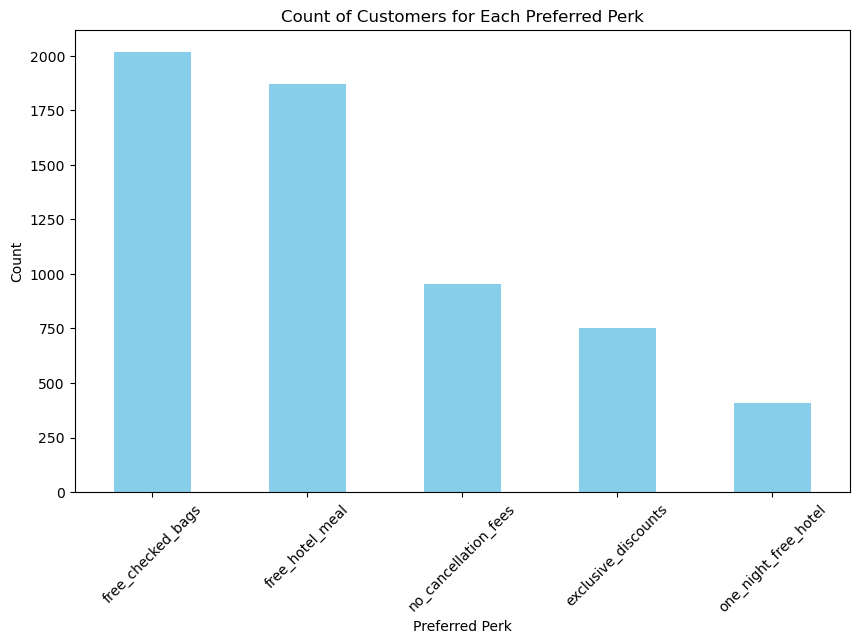

In [195]:
import matplotlib.pyplot as plt

# Count of customers for each preferred perk
preferred_perk_counts = df_clean['preferred_perk'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
preferred_perk_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Customers for Each Preferred Perk')
plt.xlabel('Preferred Perk')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



# **The Final Dataset**

In [196]:
#print the final dataset with preferred perk added
df_clean.head(3)

,user_id,age,sign_up_date,last_session_start,gender,married,has_children,home_city,home_country,number_of_sessions,avg_page_clicks,avg_session_length_minutes,recent_session,number_of_trips,number_of_flights,number_of_hotels,num_cancellations,trips_cancellations_ratio,avg_checked_bags,avg_seats,avg_flight_discount_amount,discount_flight_proportion,avg_base_fare,ads,avg_hotel_discount_amount,avg_flight_total_usd,avg_distance_km,ads_per_km,avg_hotel_total_usd,discount_hotel_proportion,avg_hotel_length,avg_total_spent,perk_label,rank_free_hotel_meal,rank_free_checked_bags,rank_no_cancellation_fees,rank_exclusive_discounts,rank_one_night_free_hotel,preferred_perk
0,544694,52,2023-01-21,2023-07-01 01:25:00,M,1,0,bakersfield,usa,8,12,1.4,52,2,2,2,0,0.0,1.0,1.0,0.00,0.00,368.35,0.0,0.10,92.09,2127.37,0.0,36.16,0.125,2.0,128.25,One Night Free Hotel,0.0,0.069869,0.0,0.0,0.653042,exclusive_discounts
1,499979,49,2022-12-30,2023-07-02 19:44:00,F,1,0,toronto,canada,10,19,2.3,50,5,5,4,0,0.0,1.0,1.0,0.05,0.01,658.65,0.0,0.05,329.33,2711.48,0.0,38.07,0.100,3.0,367.40,One Night Free Hotel,0.0,0.114655,0.0,0.0,0.585335,exclusive_discounts
2,546065,46,2023-01-22,2023-06-01 10:18:00,M,1,1,omaha,usa,8,18,2.3,82,3,3,3,0,0.0,1.0,1.0,0.00,0.00,294.76,0.0,0.00,110.53,1650.73,0.0,33.38,0.000,5.0,143.91,One Night Free Hotel,0.0,0.156927,0.0,0.0,0.533962,exclusive_discounts


# **Export to CSV**

In [197]:
#df_clean.to_csv('/Users/sebastiangurgel/Desktop/Masteryproject1/traveltide_customer_perks.csv', index=False)



---



---



# **K Means**

In [198]:
# loading the available columns
df_clean.columns

Index(['user_id', 'age', 'sign_up_date', 'last_session_start', 'gender',
       'married', 'has_children', 'home_city', 'home_country',
       'number_of_sessions', 'avg_page_clicks', 'avg_session_length_minutes',
       'recent_session', 'number_of_trips', 'number_of_flights',
       'number_of_hotels', 'num_cancellations', 'trips_cancellations_ratio',
       'avg_checked_bags', 'avg_seats', 'avg_flight_discount_amount',
       'discount_flight_proportion', 'avg_base_fare', 'ads',
       'avg_hotel_discount_amount', 'avg_flight_total_usd', 'avg_distance_km',
       'ads_per_km', 'avg_hotel_total_usd', 'discount_hotel_proportion',
       'avg_hotel_length', 'avg_total_spent', 'perk_label',
       'rank_free_hotel_meal', 'rank_free_checked_bags',
       'rank_no_cancellation_fees', 'rank_exclusive_discounts',
       'rank_one_night_free_hotel', 'preferred_perk'],
      dtype='object')

In [199]:
# i tried the features I used in my manual Segmentation- but the outcome was not as obvious
# selecting the features for K means
#selected_features = [
    #'avg_distance_km',
   #'avg_session_length_minutes',
  #  'number_of_flights',
  #   'discount_flight_proportion',
   # 'discount_hotel_proportion',
   #  'avg_hotel_total_usd',
   #    'number_of_hotels',
   #    'trips_cancellations_ratio',
   #   'age',
   #   'ads_per_km',
   #    'avg_total_spent']

In [200]:
# I tried to find the best combination of features for an obvious cluster
# selecting the features for K means
selected_features = ['age', 'avg_distance_km', 'avg_total_spent','avg_hotel_length', 'number_of_hotels','number_of_flights','avg_checked_bags',
'recent_session', 'avg_page_clicks','avg_session_length_minutes',  'trips_cancellations_ratio']

In [201]:
# Create a new DataFrame with the selected features
behavioral_metrics = df_clean[selected_features]

In [202]:
behavioral_metrics.head()

,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
0,52,2127.37,128.25,2.0,2,2,1.0,52,12,1.4,0.0
1,49,2711.48,367.40,3.0,4,5,1.0,50,19,2.3,0.0
2,46,1650.73,143.91,5.0,3,3,1.0,82,18,2.3,0.0
3,52,1411.93,278.38,3.0,4,3,2.0,49,14,1.8,0.0
4,56,2681.22,173.55,3.0,2,3,3.0,79,14,1.8,0.0


In [203]:
# Scale the features using Min-Max scaling manually
behavioral_metrics_scaled = ((behavioral_metrics - behavioral_metrics.min()) / (behavioral_metrics.max() - behavioral_metrics.min()))

In [204]:
behavioral_metrics_scaled.head()

,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
0,0.500000,0.092264,0.078337,0.096774,0.222222,0.222222,0.2,0.163743,0.097561,0.025641,0.0
1,0.458333,0.117597,0.224413,0.129032,0.444444,0.555556,0.2,0.152047,0.182927,0.051282,0.0
2,0.416667,0.071592,0.087902,0.193548,0.333333,0.333333,0.2,0.339181,0.170732,0.051282,0.0
3,0.500000,0.061236,0.170038,0.129032,0.444444,0.333333,0.4,0.146199,0.121951,0.037037,0.0
4,0.555556,0.116285,0.106007,0.129032,0.222222,0.333333,0.6,0.321637,0.121951,0.037037,0.0




---



---



# **Initialize random centroids**

In [205]:
# Define the random_centroids function
def random_centroids(behavioral_metrics_scaled, k):
    centroids = []  # This list will hold the centroids 
    for i in range(k):  #  k number of centroids 
        centroid = behavioral_metrics_scaled.apply(lambda x: float(x.sample()))   # randomly picking samples for our centroid
        centroids.append(centroid)  # Add the centroid to our list
    return pd.concat(centroids, axis=1)  # Return all the centroids together

In [206]:
# Generating random centroids for K-Means clustering
centroids = random_centroids(behavioral_metrics_scaled, 5)

In [207]:
centroids

,0,1,2,3,4
age,0.291667,0.319444,0.305556,0.250000,0.069444
avg_distance_km,0.141721,0.085736,0.092889,0.039999,0.096477
avg_total_spent,0.193891,0.005900,0.000000,0.049702,0.050655
avg_hotel_length,0.096774,0.096774,0.129032,0.032258,0.193548
number_of_hotels,0.555556,0.333333,0.444444,0.333333,0.333333
number_of_flights,0.444444,0.000000,0.222222,0.000000,0.444444
avg_checked_bags,0.000000,0.000000,0.200000,0.200000,0.000000
recent_session,0.105263,0.192982,0.467836,0.140351,0.198830
avg_page_clicks,0.121951,0.158537,0.146341,0.182927,0.146341
avg_session_length_minutes,0.025641,0.025641,0.039886,0.085470,0.056980


# **Get labels for each data point**

In [208]:
# Calculate distances of data points from centroids
distances = centroids.apply(lambda x: np.sqrt(((behavioral_metrics_scaled - x) ** 2).sum(axis=1)))
distances.head()

# 'centroids' contains the randomly generated centroids 
# 'behavioral_metrics_scaled' contains the scaled data

# The code calculates the Euclidean distance between each customer and each centroid .


# Here, 'x' represents a single centroid from the 'centroids' list.
# The expression ((behavioral_metrics_scaled - x) ** 2) calculates the squared differences between each customer
# and the qualities of the current centroid 'x'.

# The '.sum(axis=1)' part sums up the squared differences for each customer along the rows, resulting in a series of sums.

# Finally, the 'np.sqrt(...)' function calculates the square root of these sums, which gives the Euclidean distance
# between each customer and the current centroid 'x'.

# The result is a DataFrame 'distances' where each column corresponds to a centroid ,
# and each row contains the Euclidean distances of each customer from the respective centroid.


,0,1,2,3,4
0,0.513527,0.379725,0.435229,0.504448,0.549407
1,0.318728,0.658034,0.535365,0.722992,0.504268
2,0.447912,0.446131,0.258179,0.565087,0.441861
3,0.487839,0.590166,0.473416,0.606187,0.627287
4,0.780675,0.754467,0.563906,0.738387,0.802925


In [209]:
def get_labels(behavioral_metrics_scaled, centroids):
    # Calculate distances of customer from centroids
    distances = centroids.apply(lambda x: np.sqrt(((behavioral_metrics_scaled - x) ** 2).sum(axis=1)))

    # For each customer , find the index (cluster label) of the centroid that has the minimum distance
    # This assigns a cluster to each customer
    return distances.idxmin(axis=1)


In [210]:
# Assign clusters (labels) to the data points using the previously defined 'get_labels' function
labels = get_labels(behavioral_metrics_scaled, centroids)

In [211]:
labels.value_counts()

1    2086
2    1723
0    1448
4     470
3     271
dtype: int64

---


In [212]:
from sklearn.decomposition import PCA  # Importing the PCA class from the sklearn.decomposition module
import matplotlib.pyplot as plt
from IPython.display import clear_output # Importing the clear_output function from the IPython.display module

In [213]:
# Calculating the geometric mean of each feature to update the centroids and find the center of the cluster

# Defining a function called 'new_centroids' that takes three arguments:
# - behavioral_metrics_scaled: Scaled behavioral metrics data
# - labels: Cluster labels assigned to each customer
# - k: Number of clusters

def new_centroids(behavioral_metrics_scaled, labels, k):
    # Using the 'groupby' function on 'behavioral_metrics_scaled' with 'labels'
    # and applying the 'mean' function after transforming the data using logarithm
    # and exponentiation operations to calculate the geometric mean
    centroids = behavioral_metrics_scaled.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    
    # Returning the updated centroids
    return centroids


In [214]:
# Plotting the clusters in 2D and iterating over the rows

# Defining a function called 'plot_clusters' that takes four arguments:
# - behavioral_metrics_scaled: Scaled behavioral metrics data
# - labels: Cluster labels assigned to each customer
# - centroids: Centroids of the clusters
# - iteration: Current iteration number

def plot_clusters(behavioral_metrics_scaled, labels, centroids, iteration):
    # Creating an instance of PCA with 2 components to reduce data to 2D
    pca = PCA(n_components=2)
    
    # Transforming the scaled behavioral metrics data to 2D using PCA
    behavioral_metrics_scaled_2d = pca.fit_transform(behavioral_metrics_scaled)
    
    # Transforming the centroids to 2D using PCA
    centroids_2d = pca.transform(centroids.T)
    
    # Clearing previous plot and setting the title including the current iteration
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    
    # Creating a scatter plot of customer data points in 2D, coloring them by cluster labels
    plt.scatter(x=behavioral_metrics_scaled_2d[:, 0], y=behavioral_metrics_scaled_2d[:, 1], c=labels)
    
    # Creating a scatter plot of centroids in 2D
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1])
    
    # Displaying the plot
    plt.show()


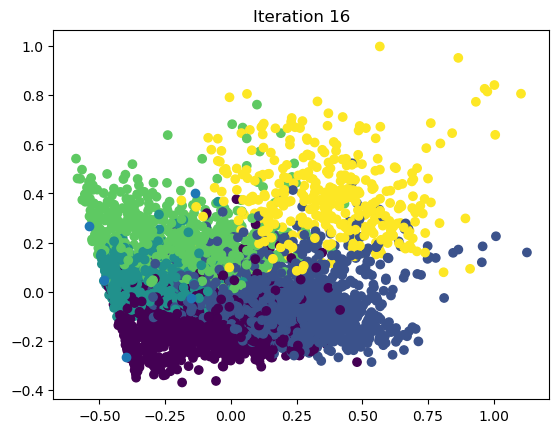

In [215]:
# Setting the maximum number of iterations and the count of centroids
max_iterations = 250
centroid_count = 5

# Initializing centroids using the random_centroids function
centroids = random_centroids(behavioral_metrics_scaled, centroid_count)

# Initializing an empty DataFrame to store old centroids for comparison
old_centroids = pd.DataFrame()

# Initializing the iteration counter
iteration = 1

# Loop to perform clustering iterations
while iteration < max_iterations and not centroids.equals(old_centroids):
    # Updating old centroids with the current centroids
    old_centroids = centroids

    # Assigning labels to each customer using the get_labels function
    labels = get_labels(behavioral_metrics_scaled, centroids)
    
    # Updating centroids using the new_centroids function
    centroids = new_centroids(behavioral_metrics_scaled, labels, centroid_count)
    
    # Plotting the clusters using the plot_clusters function
    plot_clusters(behavioral_metrics_scaled, labels, centroids, iteration)
    
    # Incrementing the iteration counter
    iteration += 1


In [216]:
centroids

,0,1,2,3,4
age,0.47881,0.000000,0.000000,0.000000,0.000000
avg_distance_km,0.00000,0.000000,0.000000,0.000000,0.000000
avg_total_spent,0.00000,0.123358,0.000000,0.000000,0.175441
avg_hotel_length,0.00000,0.156853,0.097270,0.119457,0.000000
number_of_hotels,0.00000,0.389079,0.000000,0.000000,0.000000
number_of_flights,0.00000,0.000000,0.000000,0.000000,0.000000
avg_checked_bags,0.00000,0.000000,0.000000,0.000000,0.000000
recent_session,0.00000,0.000000,0.175142,0.528039,0.000000
avg_page_clicks,0.00000,0.167312,0.000000,0.000000,0.450973
avg_session_length_minutes,0.00000,0.051020,0.000000,0.000000,0.462028


# **Assigning a Label to each customer based on the clustering**

In [217]:
# Creating separate DataFrames for each segment (cluster)
seg1_df=df_clean[labels == 0][["user_id"] + selected_features]
seg2_df=df_clean[labels == 1][["user_id"] + selected_features]
seg3_df=df_clean[labels == 2][["user_id"] + selected_features]
seg4_df=df_clean[labels == 3][["user_id"] + selected_features]
seg5_df=df_clean[labels == 4][["user_id"] + selected_features]

# **Checking visual and statisical values to get more insights of each cluster**

In [218]:

seg1_df.head()

,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
0,544694,52,2127.37,128.25,2.0,2,2,1.0,52,12,1.4,0.0
4,474464,56,2681.22,173.55,3.0,2,3,3.0,79,14,1.8,0.0
9,530213,48,1681.53,126.08,3.0,3,3,1.0,74,14,1.8,0.0
13,550400,72,5212.32,380.36,8.0,1,3,1.0,127,30,16.4,0.1
16,501125,45,1107.08,146.50,5.0,2,2,1.0,57,13,1.6,0.0


In [219]:
seg1_df.shape

(1798, 12)

In [220]:
seg1_df.describe()

,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
count,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000,1798.000000
mean,554073.328699,51.572859,1859.181669,115.146101,3.489433,1.759177,1.780311,0.710790,58.142380,14.429366,1.889321,0.001669
std,68759.277263,9.146734,1684.073267,98.548704,3.044769,1.031697,1.180962,0.645006,20.873757,4.397635,1.236555,0.012812
min,23557.000000,32.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,24.000000,4.000000,0.500000,0.000000
25%,519792.000000,45.000000,882.777500,42.105000,2.000000,1.000000,1.000000,0.000000,42.000000,11.000000,1.400000,0.000000
50%,548229.000000,50.000000,1777.490000,102.015000,3.000000,2.000000,2.000000,1.000000,54.000000,14.000000,1.700000,0.000000
75%,586600.750000,56.000000,2499.965000,163.160000,5.000000,2.000000,3.000000,1.000000,70.000000,17.000000,2.100000,0.000000
max,811077.000000,88.000000,22272.190000,739.540000,28.000000,5.000000,6.000000,5.000000,154.000000,41.000000,16.900000,0.100000


---

In [221]:
seg2_df.head()


,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
1,499979,49,2711.48,367.40,3.0,4,5,1.0,50,19,2.3,0.0
2,546065,46,1650.73,143.91,5.0,3,3,1.0,82,18,2.3,0.0
3,560733,52,1411.93,278.38,3.0,4,3,2.0,49,14,1.8,0.0
5,290123,40,2533.38,692.90,3.0,6,7,2.0,39,21,2.6,0.0
6,523442,53,1181.95,166.74,4.0,4,3,1.0,33,23,2.8,0.0


In [222]:
seg2_df.shape

(2247, 12)

In [223]:
seg2_df.describe()

,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
count,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000,2247.000000
mean,542690.671117,39.013351,2227.189315,238.382377,4.281264,3.672452,3.408990,0.971518,54.287494,18.570538,2.605429,0.006409
std,60722.523448,7.959425,1489.844379,143.283005,2.389522,1.114729,1.340701,0.540512,17.924004,5.290433,1.859970,0.024496
min,101961.000000,16.000000,0.000000,7.000000,1.000000,1.000000,0.000000,0.000000,24.000000,8.000000,1.000000,0.000000
25%,516817.500000,35.000000,1536.810000,146.235000,3.000000,3.000000,3.000000,1.000000,40.000000,15.000000,1.900000,0.000000
50%,537818.000000,39.000000,2020.420000,210.370000,4.000000,4.000000,3.000000,1.000000,50.000000,18.000000,2.200000,0.000000
75%,569952.000000,44.000000,2610.765000,297.405000,5.000000,4.000000,4.000000,1.000000,65.000000,21.000000,2.600000,0.000000
max,785107.000000,63.000000,23057.330000,1558.450000,21.000000,9.000000,9.000000,5.000000,139.000000,55.000000,18.700000,0.100000


---

In [224]:
seg3_df.head()


,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
14,498857,36,1964.98,166.30,4.0,2,3,1.0,75,17,2.1,0.0
42,528612,38,2356.40,138.23,1.0,2,2,1.0,81,12,1.4,0.0
387,512999,33,2606.84,227.29,2.0,2,3,1.0,83,14,1.7,0.0
411,556314,38,11243.92,822.33,7.0,1,2,1.0,79,12,1.6,0.0
675,523090,35,2787.78,115.80,4.0,2,2,1.0,82,11,1.4,0.0


In [225]:
seg3_df.shape

(679, 12)

In [226]:
seg3_df.describe()

,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,552578.312224,25.907216,1287.113476,56.212901,3.365243,0.874816,0.787923,0.381443,57.754050,12.777614,1.614580,0.001031
std,68674.489524,7.097629,2085.214087,77.469743,3.822658,0.693798,0.840934,0.564702,14.683983,4.235929,0.642825,0.010108
min,133058.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,4.000000,0.500000,0.000000
25%,520474.500000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,10.000000,1.200000,0.000000
50%,546664.000000,25.000000,569.100000,34.210000,3.000000,1.000000,1.000000,0.000000,59.000000,12.000000,1.500000,0.000000
75%,586717.000000,32.000000,2114.910000,79.605000,5.000000,1.000000,1.000000,1.000000,70.000000,15.000000,1.900000,0.000000
max,844489.000000,42.000000,20599.210000,822.330000,30.000000,2.000000,4.000000,3.000000,84.000000,44.000000,7.200000,0.100000


---

In [227]:
seg4_df.head()


,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
35,528411,43,949.20,184.03,2.0,3,4,1.0,135,14,1.8,0.0
37,531789,40,3180.30,266.90,4.0,2,3,1.0,125,15,1.8,0.0
38,513259,53,2381.96,240.52,5.0,2,3,1.0,126,18,2.2,0.0
53,523657,35,2972.29,244.36,2.0,2,2,1.0,142,12,1.4,0.0
56,545758,30,2712.56,111.61,4.0,2,2,1.0,103,14,1.7,0.0


In [228]:
seg4_df.shape

(898, 12)

In [229]:
seg4_df.describe()

,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,530632.158129,36.670379,1889.200111,119.667595,3.703786,1.730512,1.683742,0.678174,116.851893,14.610245,1.954009,0.002339
std,50934.958589,10.797953,2049.076978,115.817065,3.246679,1.114806,1.223234,0.695576,22.290504,4.717385,1.337000,0.015121
min,106907.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,4.000000,0.500000,0.000000
25%,513967.750000,29.000000,623.392500,36.147500,2.000000,1.000000,1.000000,0.000000,99.000000,11.000000,1.400000,0.000000
50%,528391.500000,38.000000,1716.970000,96.515000,3.000000,2.000000,2.000000,1.000000,113.000000,14.000000,1.700000,0.000000
75%,553967.250000,44.000000,2522.090000,167.585000,5.000000,2.000000,3.000000,1.000000,132.000000,17.000000,2.100000,0.000000
max,720819.000000,72.000000,20215.030000,1164.090000,23.000000,6.000000,5.000000,5.000000,195.000000,39.000000,16.700000,0.100000


---

In [230]:
seg5_df.head()


,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
28,359072,50,1051.14,160.31,2.0,4,4,1.0,114,40,16.4,0.1
46,513875,34,2090.50,504.83,4.0,3,4,2.0,44,39,16.8,0.1
165,498500,49,2415.27,141.68,4.0,4,3,1.0,59,41,17.0,0.1
169,517131,67,21441.18,1037.30,7.0,4,2,1.0,27,30,16.6,0.1
170,306819,59,491.64,145.77,1.0,3,3,1.0,35,41,17.7,0.1


In [231]:
seg5_df.shape

(376, 12)

In [232]:
seg5_df.describe()

,user_id,age,avg_distance_km,avg_total_spent,avg_hotel_length,number_of_hotels,number_of_flights,avg_checked_bags,recent_session,avg_page_clicks,avg_session_length_minutes,trips_cancellations_ratio
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,543072.226064,39.093085,4257.873723,397.355532,4.244681,2.976064,3.446809,0.952128,64.412234,42.452128,16.996543,0.106649
std,83137.260641,12.270044,4559.033924,329.313555,3.396268,1.675537,1.371069,0.702639,29.303429,10.343067,3.137092,0.033995
min,171470.000000,16.000000,0.000000,20.250000,-1.000000,0.000000,0.000000,0.000000,24.000000,13.000000,7.000000,0.100000
25%,513604.500000,30.750000,1626.245000,171.292500,2.000000,2.000000,2.000000,1.000000,41.000000,36.000000,16.100000,0.100000
50%,544545.500000,40.000000,2477.635000,290.005000,3.000000,3.000000,3.000000,1.000000,56.500000,42.000000,16.800000,0.100000
75%,585753.250000,47.000000,4539.627500,495.940000,6.000000,4.000000,4.000000,1.000000,85.000000,48.000000,18.100000,0.100000
max,770252.000000,80.000000,22098.000000,1637.160000,20.000000,7.000000,8.000000,5.000000,162.000000,86.000000,35.600000,0.300000


---

# **Putting the most important statistical values in one Dataframe**

In [233]:
import pandas as pd


# Add the 'Cluster' column to each segment dataframe
seg1_df['Cluster'] = 'Segment 1'
seg2_df['Cluster'] = 'Segment 2'
seg3_df['Cluster'] = 'Segment 3'
seg4_df['Cluster'] = 'Segment 4'
seg5_df['Cluster'] = 'Segment 5'

# Combine all the segment dataframes into a single dataframe
combined_df = pd.concat([seg1_df, seg2_df, seg3_df, seg4_df, seg5_df], ignore_index=True)

# Create an empty list to store the summary data
summary_data = []

# Iterate through each cluster
for cluster_id in range(5):
    cluster_name = f"Segment {cluster_id + 1}"
    cluster_data = {'Cluster': cluster_name}
    
    # Iterate through selected features
    for feature in selected_features:
        feature_data = combined_df[combined_df['Cluster'] == cluster_name][feature]
        feature_min = feature_data.min()
        feature_max = feature_data.max()
        feature_mean = feature_data.mean()
        feature_median = feature_data.median()
        
        # Add feature summary to cluster data
        cluster_data[f'{feature}_Min'] = feature_min
        cluster_data[f'{feature}_Max'] = feature_max
        cluster_data[f'{feature}_Mean'] = feature_mean
        cluster_data[f'{feature}_Median'] = feature_median
    
    # Add cluster data to summary list
    summary_data.append(cluster_data)

# Create a summary dataframe from the list of summary data
summary_df = pd.DataFrame(summary_data)

# Print the resulting summary dataframe
summary_df


,Cluster,age_Min,age_Max,age_Mean,age_Median,avg_distance_km_Min,avg_distance_km_Max,avg_distance_km_Mean,avg_distance_km_Median,avg_total_spent_Min,avg_total_spent_Max,avg_total_spent_Mean,avg_total_spent_Median,avg_hotel_length_Min,avg_hotel_length_Max,avg_hotel_length_Mean,avg_hotel_length_Median,number_of_hotels_Min,number_of_hotels_Max,number_of_hotels_Mean,number_of_hotels_Median,number_of_flights_Min,number_of_flights_Max,number_of_flights_Mean,number_of_flights_Median,avg_checked_bags_Min,avg_checked_bags_Max,avg_checked_bags_Mean,avg_checked_bags_Median,recent_session_Min,recent_session_Max,recent_session_Mean,recent_session_Median,avg_page_clicks_Min,avg_page_clicks_Max,avg_page_clicks_Mean,avg_page_clicks_Median,avg_session_length_minutes_Min,avg_session_length_minutes_Max,avg_session_length_minutes_Mean,avg_session_length_minutes_Median,trips_cancellations_ratio_Min,trips_cancellations_ratio_Max,trips_cancellations_ratio_Mean,trips_cancellations_ratio_Median
0,Segment 1,32,88,51.572859,50.0,0.0,22272.19,1859.181669,1777.490,0.00,739.54,115.146101,102.015,-1.0,28.0,3.489433,3.0,0,5,1.759177,2.0,0,6,1.780311,2.0,0.0,5.0,0.710790,1.0,24,154,58.142380,54.0,4,41,14.429366,14.0,0.5,16.9,1.889321,1.7,0.0,0.1,0.001669,0.0
1,Segment 2,16,63,39.013351,39.0,0.0,23057.33,2227.189315,2020.420,7.00,1558.45,238.382377,210.370,1.0,21.0,4.281264,4.0,1,9,3.672452,4.0,0,9,3.408990,3.0,0.0,5.0,0.971518,1.0,24,139,54.287494,50.0,8,55,18.570538,18.0,1.0,18.7,2.605429,2.2,0.0,0.1,0.006409,0.0
2,Segment 3,16,42,25.907216,25.0,0.0,20599.21,1287.113476,569.100,0.00,822.33,56.212901,34.210,0.0,30.0,3.365243,3.0,0,2,0.874816,1.0,0,4,0.787923,1.0,0.0,3.0,0.381443,0.0,28,84,57.754050,59.0,4,44,12.777614,12.0,0.5,7.2,1.614580,1.5,0.0,0.1,0.001031,0.0
3,Segment 4,16,72,36.670379,38.0,0.0,20215.03,1889.200111,1716.970,0.00,1164.09,119.667595,96.515,0.0,23.0,3.703786,3.0,0,6,1.730512,2.0,0,5,1.683742,2.0,0.0,5.0,0.678174,1.0,80,195,116.851893,113.0,4,39,14.610245,14.0,0.5,16.7,1.954009,1.7,0.0,0.1,0.002339,0.0
4,Segment 5,16,80,39.093085,40.0,0.0,22098.00,4257.873723,2477.635,20.25,1637.16,397.355532,290.005,-1.0,20.0,4.244681,3.0,0,7,2.976064,3.0,0,8,3.446809,3.0,0.0,5.0,0.952128,1.0,24,162,64.412234,56.5,13,86,42.452128,42.0,7.0,35.6,16.996543,16.8,0.1,0.3,0.106649,0.1


In [234]:
# export to csv to analyse it with a pivot table or in tableau
#summary_df.to_csv('/Users/sebastiangurgel/Desktop/Masteryproject1/K_means_summary.csv')